In [6]:
from datasets import load_dataset, load_from_disk, Dataset, DatasetDict

ds = load_dataset("google/fleurs", 'pa_in', cache_dir="fleurs")


/home/kd/anaconda3/envs/hf2/lib/python3.12/site-packages/datasets/load.py:1461: FutureWarning: The repository for google/fleurs contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google/fleurs
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [7]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
        num_rows: 1923
    })
    validation: Dataset({
        features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
        num_rows: 251
    })
    test: Dataset({
        features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
        num_rows: 574
    })
})

In [8]:
ds['train'][0]

{'id': 281,
 'num_samples': 164160,
 'path': '/mnt/sea/speech_pa/fleurs/downloads/extracted/e4ab8917a9bf817ef5a85b12cfb4220b6fd1a4451ecb603865b840caedd8c611/10006117397382978925.wav',
 'audio': {'path': 'train/10006117397382978925.wav',
  'array': array([ 0.        ,  0.        ,  0.        , ..., -0.0038923 ,
         -0.00428808, -0.00482011]),
  'sampling_rate': 16000},
 'transcription': 'ਵਿਰੋਧ ਦੇ ਆਯੋਜਕਾਂ ਨੇ ਕਿਹਾ ਕਿ ਜਰਮਨ ਦੇ ਸ਼ਹਿਰਾਂ ਜਿਵੇਂ ਕਿ ਬਰਲਿਨ ਕੋਲੋਨ ਹੈਮਬਰਗ ਅਤੇ ਹਨੋਵਰ ਵਿੱਚ ਲਗਭਗ 100,000 ਲੋਕ ਬਦਲ ਗਏ।',
 'raw_transcription': 'ਵਿਰੋਧ ਦੇ ਆਯੋਜਕਾਂ ਨੇ ਕਿਹਾ ਕਿ ਜਰਮਨ ਦੇ ਸ਼ਹਿਰਾਂ ਜਿਵੇਂ ਕਿ ਬਰਲਿਨ, ਕੋਲੋਨ, ਹੈਮਬਰਗ ਅਤੇ ਹਨੋਵਰ ਵਿੱਚ ਲਗਭਗ 100,000 ਲੋਕ ਬਦਲ ਗਏ।',
 'gender': 1,
 'lang_id': 73,
 'language': 'Punjabi',
 'lang_group_id': 4}

In [15]:
def get_duration(x):
    x['duration'] = len(x['audio']['array']) / x['audio']['sampling_rate']
    x['speaker_id'] = None
    return x

ds = ds.remove_columns(['id', 'num_samples', 'raw_transcription', 'lang_id', 'language', 'lang_group_id', 'path'])
ds = ds.rename_column('transcription', 'text')
ds = ds.map(get_duration, num_proc=16)
ds


Map (num_proc=16):   0%|          | 0/1923 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/251 [00:00<?, ? examples/s]

Map (num_proc=16):   0%|          | 0/574 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 1923
    })
    validation: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 251
    })
    test: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 574
    })
})

In [16]:
ds['train'][0]

{'audio': {'path': None,
  'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00390625,
         -0.00430298, -0.00482178]),
  'sampling_rate': 16000},
 'text': 'ਵਿਰੋਧ ਦੇ ਆਯੋਜਕਾਂ ਨੇ ਕਿਹਾ ਕਿ ਜਰਮਨ ਦੇ ਸ਼ਹਿਰਾਂ ਜਿਵੇਂ ਕਿ ਬਰਲਿਨ ਕੋਲੋਨ ਹੈਮਬਰਗ ਅਤੇ ਹਨੋਵਰ ਵਿੱਚ ਲਗਭਗ 100,000 ਲੋਕ ਬਦਲ ਗਏ।',
 'gender': 1,
 'duration': 10.26,
 'speaker_id': None}

In [18]:
# rename validation split to valid
ds['valid'] = ds['validation']
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 1923
    })
    validation: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 251
    })
    test: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 574
    })
    valid: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 251
    })
})

In [21]:
ds= DatasetDict({
    'train': ds['train'],
    'valid': ds['valid'],
    'test': ds['test']}
)
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 1923
    })
    valid: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 251
    })
    test: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 574
    })
})

In [ ]:
# remove path
ds = ds.remove_columns('path')

In [14]:
import pandas as pd

df = pd.Series(ds['train']['id'])

# check duplicates
df.value_counts()

446     3
5       3
347     3
86      3
81      3
       ..
776     1
909     1
1252    1
728     1
451     1
Name: count, Length: 1183, dtype: int64

(array([107., 522., 639., 379., 181.,  66.,  21.,   4.,   2.,   2.]),
 array([ 2.88,  6.27,  9.66, 13.05, 16.44, 19.83, 23.22, 26.61, 30.  ,
        33.39, 36.78]),
 <BarContainer object of 10 artists>)

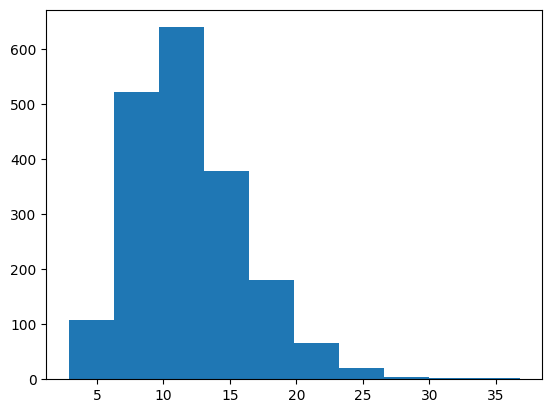

In [12]:
import pylab as plt
plt.hist(ds['duration'])

In [22]:
ds.save_to_disk('/mnt/data/Speech Dataset/processed_datasets/Fleurs_pa_ASR/')

Saving the dataset (0/2 shards):   0%|          | 0/1923 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/251 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/574 [00:00<?, ? examples/s]

In [1]:
from datasets import load_from_disk

ds = load_from_disk('/mnt/data/Speech Dataset/processed_datasets/Fleurs_pa_ASR/')
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 1923
    })
    valid: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 251
    })
    test: Dataset({
        features: ['audio', 'text', 'gender', 'duration', 'speaker_id'],
        num_rows: 574
    })
})

In [2]:
ds['train'].features

{'audio': Audio(sampling_rate=16000, mono=True, decode=True, id=None),
 'text': Value(dtype='string', id=None),
 'gender': ClassLabel(names=['male', 'female', 'other'], id=None),
 'duration': Value(dtype='float64', id=None),
 'speaker_id': Value(dtype='null', id=None)}

In [10]:
def map_gender(row):
    if row['gender'] == '1':
        row['gender'] = 'f'
    else:
        row['gender'] = 'm'
    return row

from datasets import Value
# convert type to string
ds = ds.cast_column('gender', Value(dtype='string'))
print(ds['train'][0])
ds = ds.map(map_gender, num_proc=24)



Casting the dataset:   0%|          | 0/1923 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/251 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/574 [00:00<?, ? examples/s]

{'audio': {'path': None, 'array': array([ 0.        ,  0.        ,  0.        , ..., -0.00390625,
       -0.00430298, -0.00482178]), 'sampling_rate': 16000}, 'text': 'ਵਿਰੋਧ ਦੇ ਆਯੋਜਕਾਂ ਨੇ ਕਿਹਾ ਕਿ ਜਰਮਨ ਦੇ ਸ਼ਹਿਰਾਂ ਜਿਵੇਂ ਕਿ ਬਰਲਿਨ ਕੋਲੋਨ ਹੈਮਬਰਗ ਅਤੇ ਹਨੋਵਰ ਵਿੱਚ ਲਗਭਗ 100,000 ਲੋਕ ਬਦਲ ਗਏ।', 'gender': '1', 'duration': 10.26, 'speaker_id': None}


Map (num_proc=24):   0%|          | 0/1923 [00:00<?, ? examples/s]

Map (num_proc=24):   0%|          | 0/251 [00:00<?, ? examples/s]

Map (num_proc=24):   0%|          | 0/574 [00:00<?, ? examples/s]

In [11]:
ds.save_to_disk('/mnt/data/Speech Dataset/processed_datasets/fleurs_pa_ASR/', num_proc=24)

Saving the dataset (0/24 shards):   0%|          | 0/1923 [00:00<?, ? examples/s]

Saving the dataset (0/24 shards):   0%|          | 0/251 [00:00<?, ? examples/s]

Saving the dataset (0/24 shards):   0%|          | 0/574 [00:00<?, ? examples/s]